# 2.3.7 커널 서포트 벡터 머신

## 커널 기법

새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있음. -> 커널 기법

실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)를 계산.

## svm 이해하기

일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 줌. 바로 두 클래스 사이의 경계에 위치한 데이터 포인트들.

이런 데이터를 서포트 벡터라 하며, 여기서 서포트 벡터 머신이란 이름이 유래됨.

새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정함. 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습함.

Text(0,0.5,'특성 1')

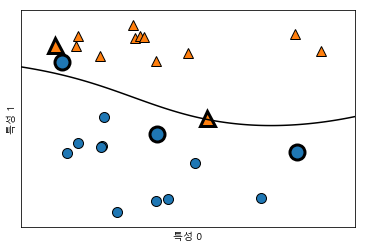

In [25]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## svm 매개변수 튜닝

gamma 매개변수는 가우시안 커널 폭의 역수에 해당.

gamma 매개변수가 하나의 훈련 샘풀이 미치는 영향의 범위를 결정함.

작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적임.

즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위고 커짐.

C 매겨변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수.

각 인트의 중요도를 제한함.

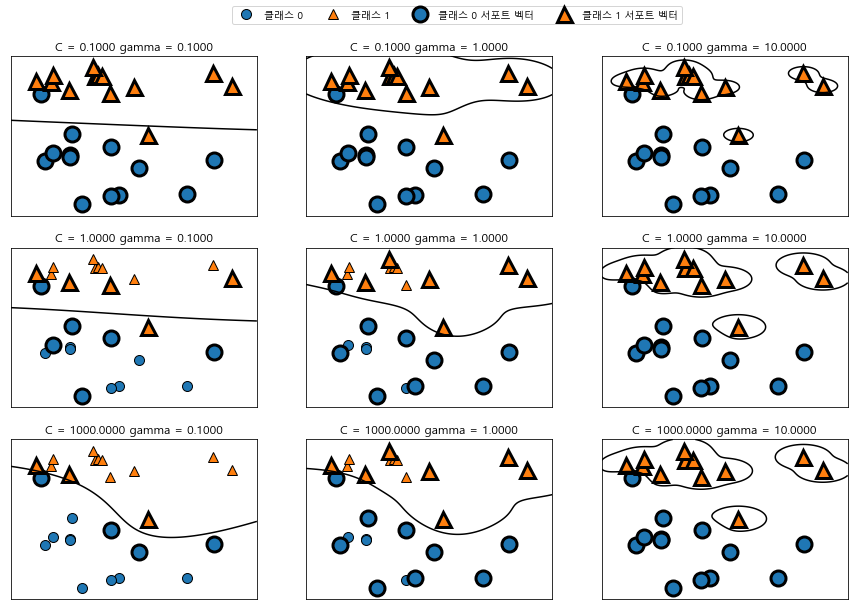

In [16]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

작은 gamma 값은 가우시안 커널의 반경을 크게 하여 많은 포인트들이 가까이 있는 것으로 고려됨.

그래서 왼쪽 그림의 걸정 경계는 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해짐.

작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복접도를 낮춤. 반면에 큰 gamma 값은 더 복잡한 모델은 만듦.

선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작음.

왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않음.

C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 함.

In [27]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

svc = SVC()
svc.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train,y_train)))
print("훈련 세트 정확도: {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 정확도: 1.00
훈련 세트 정확도: 0.63


매우 과대적합

SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감.

특히 입력 특성의 범위가 비슷해야함.

Text(0,0.5,'특성 크기')

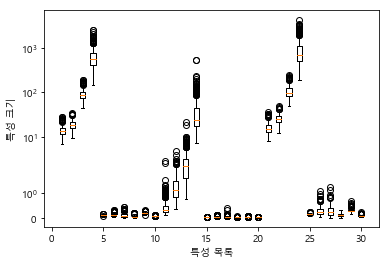

In [28]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름.

커널 SVM에서는 영향이 아주 큼.

## SVM을 위한 데이터 전처리

특성 값의 범위가 비슷해지도록 조정. 커널 SVM에서는 모든 특성 값을 0과 1 사이로 맞추는 방법을 많이 사용함.

In [34]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [38]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


여기서 C 나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음.

In [40]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


커널 세포트 벡터 머신은 다양한 데이터셋에서 잘 작동함. 데이터의 특성이 몇 개 안되더라도 복잡한 결정 경계를 만들 수 있음.

저차원과 고차원의 데이터에(즉 특성이 적을 때와 많을 때) 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음.

또 다른 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야함.

하지마 모든 특성이 비슷한 단위이고 스케일이 비슷하면 SVM을 시도해볼 만 함.

커널 SVM에서 중요한 매개변수는 규제 매개변수 C이고 어떤 커널을 사용할지와 각 커널에 따른 매개변수임.